<a href="https://colab.research.google.com/github/JinLeeGG/AI_Project_Preparation/blob/main/4.%20Deep%20Learning/6.%20Multi-class%20Weather%20Dataset/6_Multi_class_Weather_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://ryuzyproject.tistory.com/77?category=1177429

# 1. Multi-class Weather Dataset
[Multi-class Weather](https://www.kaggle.com/datasets/pratik2901/multiclass-weather-dataset) Dataset은 다양한 기상 조건을 포함하는 이미지 데이터셋으로, 주로 기계 학습 및 딥러닝 모델을 학습하거나 평가하는 데 사용됩니다. 이 데이터셋은 맑음, 비, 눈, 흐림과 같은 여러 날씨 유형으로 라벨이 지정된 다중 클래스 분류 문제를 다룹니다. 각 클래스는 다양한 시간대, 계절, 지역에서 촬영된 이미지를 포함하여 현실 세계의 다양성을 반영하도록 설계되었습니다. 이를 통해 모델은 날씨 조건을 정확히 분류하고, 기상 관측, 자동화된 날씨 보고, 혹은 자율주행 차량의 환경 인식 시스템과 같은 다양한 응용 분야에서 활용될 수 있습니다.

In [1]:
from google.colab import files
files.upload()  # kaggle.json 업로드 창 표시
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json # kaggle, settings, api download, and upload file

Saving kaggle.json to kaggle.json


In [2]:
# dataset 가서 download, Download via kaggle CLI, copy and paste
!kaggle datasets download pratik2901/multiclass-weather-dataset

Dataset URL: https://www.kaggle.com/datasets/pratik2901/multiclass-weather-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/91.4M [00:00<?, ?B/s]
100% 91.4M/91.4M [00:00<00:00, 1.40GB/s]


In [3]:
import os
import zipfile # zipfile
import random
from shutil import copyfile, rmtree # file dir management module

In [4]:
zip_file = 'multiclass-weather-dataset.zip' # 압축 폴더
base_dir = './Multi-class Weather Dataset' # 압축 풀었을때 나오는 폴더
train_dir = './train' # training 할 dataset이 있는 dir
test_dir = './test'   # test 할 dataset이 있는 dir

In [5]:
with zipfile.ZipFile(zip_file, 'r') as zip_ref: # 압축 하려면 'w'
    zip_ref.extractall('.') # 현재 dir에 압축해제, extract은 특정 파일만 압축해제

In [6]:
# 분류 디렉터리 목록
categories = ['Cloudy', 'Rain', 'Shine', 'Sunrise']

In [7]:
# os.path는 주소관리하는 모듈
# 특정 경로가 존재하면 rmtree(train_dir) 이 dir를 지워라
if os.path.exists(train_dir):
    rmtree(train_dir)
if os.path.exists(test_dir):
    rmtree(test_dir)

In [8]:
# train, test 폴더 및 하위 카테고리 폴더 생성
os.makedirs(train_dir, exist_ok=True) # exist_ok = True 만약 만들려고 하는 dir가 있으면 그냥 냅둬라
os.makedirs(test_dir, exist_ok=True)

for category in categories: # 각 카테고리별로
    os.makedirs(os.path.join(train_dir, category), exist_ok=True) # training 안에 각 카테고리 dir 만들기
    os.makedirs(os.path.join(test_dir, category), exist_ok=True) # test 안에 각 카테고리dir 만들기

In [9]:
base_dir = '/content/Multi-class Weather Dataset' # 현재 데이터가 있는 압축풀린 파일

# 각 카테고리별 데이터 파일 나누기
for category in categories: # 각 카테고리별로

    # '/content/Multi-class Weather Dataset/Cloudy'
    # '/content/Multi-class Weather Dataset/Rain'
    category_path = os.path.join(base_dir, category) # 주소를 합친다 (base_dir + category)

    # os.listdir - 안에 들어있는 파일들을 다 list로 가져오게 된다.
    files = os.listdir(category_path)

    # 각 카테고리 별 파일들을 다 가져온다.
    # print(files)

    # 데이터 섞기 (같은 리스트 안에 들어가있는 것끼리)
    random.shuffle(files)

    # 데이터 나누기 (8:2 비율)
    split_idx = int(len(files) * 0.8) # 전체의 80%의 인덱스를 저장해준다.
    train_files = files[:split_idx] # 파일에서 80%까지만 슬라이싱을 해준다. (training 파일로 저장)
    test_files = files[split_idx:]  # 나머지 파일은 테스트 파일로 저장해준다.

    # 파일 복사
    for file in train_files: # 각 training 파일마다

        # '/content/Multi-class Weather Dataset/Cloudy/Cloudy1.jpg'
        src = os.path.join(category_path, file) # 경로를 합쳐서 src에 저장 (category_path + file)

        # /content/train/Cloudy/cloudy1.jpg
        dst = os.path.join(train_dir, category, file) # 트레이닝 파일로 따로 저장
        copyfile(src, dst) # src에서 dst로 파일 카피


    for file in test_files: # 각 testing 파일마다
        src = os.path.join(category_path, file)
        dst = os.path.join(test_dir, category, file)
        copyfile(src, dst)

In [10]:
import torch
import time
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torchvision.datasets as datasets
from torchvision.utils import make_grid
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import matplotlib.image as image
import numpy as np

In [11]:
# 트레이닝 값
transform_train = transforms.Compose([

    # 사진의 사이즈를 변환시켜도 pixel값은 같기때문에 학습시키는데는 지장이 없다.
    transforms.Resize((256, 256)), # 사진의 크기가 제각각임으로 일정하게 만들기 위해서 256 256으로 바꿔준다.

    # 증강기법을 사용
    transforms.RandomHorizontalFlip(), # 랜덤으로 좌우반전. 확률 50%

    transforms.ToTensor(), # 텐서로 변환, 0부터 1까지 정규화 (색상에 대한 밝기 정보가 0~255이기 때문에 스케일을 줄여주기 위해서 사용)

    # 값을 -1 에서 0으로 바꿔준다.
    # 조금 더 성능을 높이기 위해서 LeRU를 사용한다. (활성화 함수)
    transforms.Normalize(
        # 색상값이라서 3개씩 묶어서 가용한다. (RGB)
        mean=[0.5, 0.5, 0.5], # 평균을 0.5
        std=[0.5, 0.5, 0.5]   # 표준편차 0.5
    )
])


# 테스트값 - 증강기법은 필요없다.
transform_test = transforms.Compose([
    transforms.Resize((256, 256)), # 사이즈 맞추기
    transforms.ToTensor(), # 텐서로 바꾸기
    transforms.Normalize( # 정규화
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5]
    )
])




In [12]:
train_dataset = datasets.ImageFolder( # 모든 이미지 파일들을 가져와서 다음을 적용
    root='train/', # 레이블을 만들고, 데이터를 저장
    transform=transform_train # 이미지를 가져오면서 trainsform_train을 적용
)

### ※ transforms.ToTensor()

- 이미지를 PyTorch 텐서(tensor)로 변환합니다.
- 이미지의 픽셀 값을 [0, 255] 범위에서 [0.0, 1.0] 범위로 정규화합니다.
- 이미지의 차원을 (H, W, C) 형식에서 PyTorch에서 사용하는 (C, H, W) 형식으로 바꿉니다.
    - H: 이미지의 높이 (Height)
    - W: 이미지의 너비 (Width)
    - C: 채널(Channel; 예: RGB 이미지의 경우 3)

### ※ transforms.Normalize(mean, std)

- 텐서로 변환된 이미지의 픽셀 값을 정규화(normalization)합니다.
- mean: 각 채널(R, G, B)의 평균값.
- std: 각 채널의 표준편차.
- mean=[0.5, 0.5, 0.5]: R, G, B 채널 각각의 평균을 0.5로 설정.
- std=[0.5, 0.5, 0.5]: R, G, B 채널 각각의 표준편차를 0.5로 설정.
- 이 정규화는 일반적으로 픽셀 값의 범위를 [−1,1][-1, 1][−1,1]로 조정하기 위해 사용됩니다. (픽셀 값이 [0,1][0, 1][0,1]로 변환된 상태에서)
    - 예) x = [0.2, 0.4, 0.7, 0.9] 경우 모두 양수이므로 그대로 통과
    - 예) x = [-0.8, -0.2, 0.3, 0.9] 경우 ReLU를 통과하면 [0.0, 0.0, 0.3, 0.9]

### ※ ImageFolder

- datasets.ImageFolder는 이미지 데이터를 특정 디렉터리 구조에서 로드하는 클래스입니다.
- 디렉터리 이름을 레이블(class label)로 간주하며, 각 디렉터리 내의 이미지 파일들을 해당 레이블에 할당합니다.
- 이 클래스는 이미지 데이터를 PyTorch 데이터셋(Dataset) 형식으로 변환하므로, DataLoader와 함께 사용하여 배치 처리 및 데이터 증강(data augmentation)을 쉽게 적용할 수 있습니다.

In [13]:
dataset_size = len(train_dataset)
train_size = int(dataset_size * 0.8) # train 사이즈에서 빼기

# 학습하면서 중간에 테스트 용도
val_size = dataset_size - train_size # 뺀 값을 valid 사이즈

In [14]:
# train_dataset에서 분리를 해서 각각 train_dataset, val_dataset에다가 넣기
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

In [15]:
# test 데이터셋 만들기
test_dataset = datasets.ImageFolder(
    root='test/', # 레이블을 만들고, 데이터를 저장
    transform=transform_test # transform_test 적용
)

In [16]:
# 미니배치를 사용할려고 데이터 로더 사용 (64개씩 학습)
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False) # valid와 test는 굳이 섞을필요는 없다 (테스팅용)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False) # 굳이 64개씩 시험을 치게 할 필요는 없다.

In [17]:
# Mathplolid 환경값 (전체 설정 -환경값)
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 60
plt.rcParams.update({'font.size': 20})

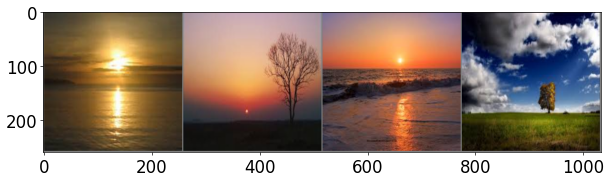

['Sunrise', 'Sunrise', 'Sunrise', 'Cloudy']


In [18]:
# 이미지를 보여주기위해서 함수를 만든다.
def imshow(input):

    # torch.Tensor => numpy
    input = input.numpy().transpose((1, 2, 0)) #순서 바꾸기 tensor에서는 permute
    mean = np.array([0.5, 0.5, 0.5]) # 평균
    std = np.array([0.5, 0.5, 0.5]) # 표준편차
    input = std * input + mean # 정규화 해제 (역정규화)
    input = np.clip(input, 0, 1) # 값이 0보다 작은 경우 0, 1보다 큰 경우 1로 변환합니다.
    plt.imshow(input) #
    plt.show()

# 현재 클래스 이름이 알파벳순임으로 수동으로 설정해준다.
class_names = {
    0:"Cloudy", 1:"Rain", 2:"Shine", 3:"Sunrise"
}

iterator = iter(train_dataloader) # 차례대로 데이터를 넣어줄 수 있게 만든다.
imgs, labels = next(iterator) # 데이터 로더중에 하나를 뽑아온다. (64개씩 들어간다)
out = make_grid(imgs[:4]) # 여러 이미지를 하나의 격자 형태로 합침
imshow(out) # 4개만 찍어본다 (순서대로)

print([class_names[labels[i].item()] for i in range(4)]) # 각 뭐에 해당하는지 뽑아온다.

# 2. 다양한 모델 만들기


In [19]:
# 단일 선형 계층
# 활성화 함수나 추가 계층이 없으므로 모델이 표현할 수 있는 함수는 단순 선형 변환에 제한
# 파라미터 수 (256*256*3+1)*4 = 786,436
class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__() # 부모 생성자 호출 (맴버 변수 초기화)
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(256 * 256 * 3, 4) # 컬러값이 3이니까 256, 256 * 256 * 3 (class 개수는 4개 1채널, rgb)

    # 객체 생성하고 실행하면 여기있는걸 차례대로 실행
    # 이미지를 받아서 한줄로 세운다. (1, 196,608)
    def forward(self, x): # x는 이미지
        x = self.flatten(x) # 한줄로 세워준다.
        x = self.linear1(x) # 4개로 바꿔서 넣어준다.
        return x  # 단일 선형계층


In [20]:
# 두 개의 선형 계층을 사용하여 입력 데이터를 단계적으로 압축
# 파라미터 수
 # Linear 1 : (256*256*3+1)*64
 # Linear 2 : (64*4) = 256 + 4 = 260
 # = 12,583,236
class Model2(nn.Module):
    def __init__(self):
        super(Model2, self).__init__()
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(256 * 256 * 3, 64)
        self.linear2 = nn.Linear(64, 4)


    def forward(self, x):
        x = self.flatten(x)
        x = self.linear1(x)
        x = self.linear2(x)
        return x

In [21]:
# 다중 구조와 ReLU 활성화 함수를 사용하여 비선형적 특징을 학습할 수 있음
# Dropout을 통해 과적합을 방지
# (256*256*3+1)*128 + (128+1)*64 + (64+1)*32 + (32+1)*4 = 25176420
class Model3(nn.Module):
    def __init__(self):
        super(Model3, self).__init__()
        self.linear1 = nn.Linear(256 * 256 * 3, 128)
        self.dropout1 = nn.Dropout(0.5) # 노드 절반을 꺼준다. (특정 가중치에만 과적합되는걸 방지하기위해서 사용)
        self.linear2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.5)
        self.linear3 = nn.Linear(64, 32)
        self.dropout3 = nn.Dropout(0.5)
        self.linear4 = nn.Linear(32, 4)
        self.flatten = nn.Flatten()

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.linear1(x))
        x = self.dropout1(x)
        x = F.relu(self.linear2(x))
        x = self.dropout2(x)
        x = F.relu(self.linear3(x))
        x = self.dropout3(x)
        x = self.linear4(x)
        return x


### ※ nn.Module 상속

1. 모델 구성 요소 관리: 레이어와 파라미터를 자동으로 관리.
2. 순전파(Forward) 정의: forward() 메서드를 통해 간단하고 일관된 순전파 과정 정의.
3. 계층적 설계: 서브모듈을 활용해 복잡한 모델을 쉽게 설계.
4. 유틸리티 제공: 파라미터 저장/로드, 학습/추론 모드 전환 등 다양한 기능 제공.
5. PyTorch 호환성: 최적화, 데이터 로더 등 PyTorch의 다른 기능과 손쉽게 통합.
6. 추상화: 저수준 작업을 추상화하여 개발자의 생산성을 향상.


### ※ Dropout

nn.Dropout()은 PyTorch에서 제공하는 과적합(overfitting)을 방지하기 위한 레이어입니다. 드롭아웃은 학습 과정 중 일부 뉴런을 무작위로 "비활성화(drop)"함으로써, 모델이 특정 뉴런에 지나치게 의존하지 않도록 도와줍니다. 이를 통해 모델의 일반화 성능이 향상됩니다.

In [22]:
# 학습
def train():
    start_time = time.time() # 시간을 우선 불러온다.
    print(f'[Epoch: {epoch + 1} - Training]')
    model.train()
    # 변수 선언
    total = 0
    running_loss = 0.0
    running_corrects = 0

    # dataloader가 bath에 이미지와 라벨을 묶어서 넣어준다.
    for i, batch in enumerate(train_dataloader):
        imgs, labels = batch # 각각 이미지와 라벨로 나눈다.
        imgs, labels = imgs.cuda(), labels.cuda() # GPU에서 돌린다.

        outputs = model(imgs) # 이미지를 넣어서 예측을 한다.
        optimizer.zero_grad() # 학습을 시작한다.
        _, preds = torch.max(outputs, 1) # 결과값, 즉 열의 최대값을 뽑는다. (_ 에는 가장 높은 값, preds 는 index가 들어간다.)
        loss = criterion(outputs, labels) # criterion은 cross-entrophy 함수이다. (로스 함수)

        loss.backward() # 백워드 하고
        optimizer.step() # 업데이트를 시킨다.

        total += labels.shape[0] # 라벨의 개수를 증가시킨다. (데이터 개수)
        running_loss += loss.item() # 로스값을 더해서 누적한다
        running_corrects += torch.sum(preds == labels.data) #  맞췄는지 틀렸는지에 따라서 더해준다.

        if i % log_step == 0: # 짝수마다 돌린다.
            print(f'[Batch: {i + 1}] running train loss: {running_loss / total}, running train accuracy: {running_corrects / total}')

    # 결과 출력
    print(f'train loss: {running_loss / total}, accuracy: {running_corrects / total}')
    print("elapsed time:", time.time() - start_time)
    return running_loss / total, (running_corrects / total).item()


In [23]:
# 검증
def validate():
    start_time = time.time()
    print(f'[Epoch: {epoch + 1} - Validation]')
    model.eval()
    total = 0
    running_loss = 0.0
    running_corrects = 0

    for i, batch in enumerate(val_dataloader): # img.. label을 꺼내서 각각 저장
        imgs, labels = batch
        imgs, labels = imgs.cuda(), labels.cuda() # gpu 연산

        with torch.no_grad(): # 예측
            outputs = model(imgs) # 예측한 값 저장
            _, preds = torch.max(outputs, 1) # 가장 큰 예측값을 넣어준다.
            loss = criterion(outputs, labels) # 오차 있는지 판단

        total += labels.shape[0] # 전체 개수 누적
        running_loss += loss.item() # 로스값 누적
        running_corrects += torch.sum(preds == labels.data) # 맞았는지 보기

        if i % log_step == 0:
            print(f'[Batch: {i + 1}] running val loss: {running_loss / total}, running val accuracy: {running_corrects / total}')

    # 결과값 출력
    print(f'val loss: {running_loss / total}, accuracy: {running_corrects / total}')
    print("elapsed time:", time.time() - start_time)
    return running_loss / total, (running_corrects / total).item()

In [24]:
# 평가
def test():
    start_time = time.time()
    print(f'[Test]')
    model.eval()
    total = 0
    running_loss = 0.0
    running_corrects = 0


    for i, batch in enumerate(test_dataloader):
        imgs, labels = batch
        imgs, labels = imgs.cuda(), labels.cuda()

        with torch.no_grad():
            outputs = model(imgs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

        total += labels.shape[0]
        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels.data)

        if i % log_step == 0:
            print(f'[Batch: {i + 1}] running test loss: {running_loss / total}, running test accuracy: {running_corrects / total}')

    print(f'test loss: {running_loss / total}, accuracy: {running_corrects / total}')
    print("elapsed time:", time.time() - start_time)
    return running_loss / total, (running_corrects / total).item()



In [25]:
# ephoch마다 learning rate를 다르게 주기
# adjust_lr이 돌아갈때마다 learning rate를 조절해준다.
def adjust_learning_rate(optimizer, epoch):
    lr = learning_rate
    if epoch >= 3: # 에포크가 3번째 바퀴일때
        lr /= 10  # 10으로 나눠서 보폭을 줄여준다.
    if epoch >= 7: # 7일때
        lr /= 10 # 더 줄이기
    for param_group in optimizer.param_groups: # param_group에 learning rate를 계산해서 넣어준다.
        param_group['lr'] = lr

In [26]:
# 단일 선형 계층 모델 사용

learning_rate = 0.01
model = Model1() # 모델 객체 생성

optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9) # momentum 지난 기울기의 90%를 반영


In [27]:
optimizer.param_groups # optimizer에 설정할 수 있는 값들

[{'params': [Parameter containing:
   tensor([[-1.5649e-04,  2.1215e-03,  1.3598e-03,  ...,  1.9036e-03,
            -2.0950e-03,  9.4678e-04],
           [-2.0460e-03, -1.9254e-03, -2.2139e-03,  ...,  1.4972e-04,
            -1.2155e-03, -1.4376e-03],
           [-8.5639e-04,  2.1036e-03, -5.8205e-04,  ..., -1.1798e-03,
            -2.0973e-03,  1.7662e-03],
           [-6.8336e-04,  3.0876e-04,  9.1499e-04,  ...,  7.2067e-04,
             7.1576e-04, -4.8760e-05]], requires_grad=True),
   Parameter containing:
   tensor([-1.7294e-03, -3.5418e-06, -1.3675e-03, -1.4903e-03],
          requires_grad=True)],
  'lr': 0.01,
  'momentum': 0.9,
  'dampening': 0,
  'weight_decay': 0,
  'nesterov': False,
  'maximize': False,
  'foreach': None,
  'differentiable': False,
  'fused': None}]

In [28]:
# model 1 트레이닝
learning_rate = 0.01
log_step = 3

model = Model1()
model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# epoch의 바퀴 수는 돌려보면서 acc 값이 올라갈때 그리고 loss값이 가장 적을때를 찾아간다.
num_epochs = 20 # epoch 20바퀴 돌린다.
best_val_acc = 0
best_epoch = 0

history = []
accuracy = []

os.makedirs("weights/Model1", exist_ok=True) # 폴더를 하나 만들어준다.

for epoch in range(num_epochs): # 20바퀴가 돈다.
    adjust_learning_rate(optimizer, epoch) # lr를 조절시킨다.
    train_loss, train_acc = train() # train() 함수를 실행시켜서 loss와 acc를 가져온다.
    val_loss, val_acc = validate() # validate로 학습 도중에 시험을 시켜준다.
    history.append((train_loss, val_loss)) # 학습 로스와 검증 로스를 튜플로 저장해준다.
    accuracy.append((train_acc, val_acc)) # acc로 같이 튜플로 저장해준다.

    if val_acc > best_val_acc: # 정확도가 제일 높을때 또는 처음에
        print("[Info] best validation accuracy!")
        best_val_acc = val_acc # 현재 acc값을 저장한다.
        best_epoch = epoch # 현재 epoch 값도 저장한다.
        torch.save(model.state_dict(), f"weights/Model1/best_checkpoint_epoch_{epoch + 1}.pth") # 현재 모델에 가중치를 불러와서 파일로 저장한다.

torch.save(model.state_dict(), f"weights/Model1/last_checkpoint_epoch_{num_epochs}.pth") # 다 끝나고 나서 마지막으로 나온 제일 나은 epoch를 저장한다.


[Epoch: 1 - Training]
[Batch: 1] running train loss: 0.022767312824726105, running train accuracy: 0.21875
[Batch: 4] running train loss: 0.29860335774719715, running train accuracy: 0.45703125
[Batch: 7] running train loss: 0.31484802812337875, running train accuracy: 0.5223214626312256
[Batch: 10] running train loss: 0.3023506589233875, running train accuracy: 0.567187488079071
train loss: 0.2992199166925295, accuracy: 0.5771905779838562
elapsed time: 5.466575384140015
[Epoch: 1 - Validation]
[Batch: 1] running val loss: 0.17195621132850647, running val accuracy: 0.84375
val loss: 0.3208024342854818, accuracy: 0.7277777791023254
elapsed time: 0.9891250133514404
[Info] best validation accuracy!
[Epoch: 2 - Training]
[Batch: 1] running train loss: 0.4931057095527649, running train accuracy: 0.6875
[Batch: 4] running train loss: 0.37278807163238525, running train accuracy: 0.6953125
[Batch: 7] running train loss: 0.3507128187588283, running train accuracy: 0.7031250596046448
[Batch: 10]

[Test]
[Batch: 1] running test loss: 0.2878139615058899, running test accuracy: 0.53125
[Batch: 4] running test loss: 0.18622647502781015, running test accuracy: 0.7079645991325378
test loss: 0.18622647502781015, accuracy: 0.7079645991325378
elapsed time: 1.6550500392913818
Test loss: 0.18622648
Test accuracy: 70.80%


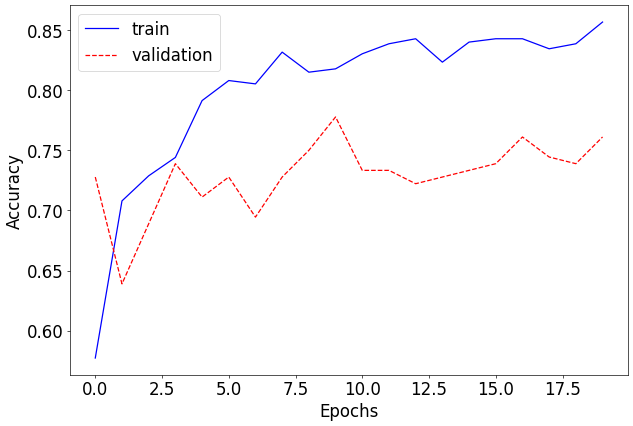

In [29]:
# 모델 1 시각화 및 정확도
plt.plot([x[0] for x in accuracy], 'b', label='train')
plt.plot([x[1] for x in accuracy], 'r--',label='validation')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

test_loss, test_accuracy = test()
print(f"Test loss: {test_loss:.8f}")
print(f"Test accuracy: {test_accuracy * 100.:.2f}%")

[Epoch: 1 - Training]
[Batch: 1] running train loss: 0.022607266902923584, running train accuracy: 0.109375
[Batch: 4] running train loss: 0.10900840535759926, running train accuracy: 0.4375
[Batch: 7] running train loss: 0.09338075827275004, running train accuracy: 0.4977678656578064
[Batch: 10] running train loss: 0.1417483825236559, running train accuracy: 0.49687501788139343
train loss: 0.20352844170635367, accuracy: 0.5076495409011841
elapsed time: 5.333830118179321
[Epoch: 1 - Validation]
[Batch: 1] running val loss: 0.8516188859939575, running val accuracy: 0.53125
val loss: 0.9690365897284614, accuracy: 0.49444445967674255
elapsed time: 0.9741685390472412
[Info] best validation accuracy!
[Epoch: 2 - Training]
[Batch: 1] running train loss: 1.100205421447754, running train accuracy: 0.484375
[Batch: 4] running train loss: 0.8881646394729614, running train accuracy: 0.48828125
[Batch: 7] running train loss: 0.8446626152311053, running train accuracy: 0.4441964626312256
[Batch: 10

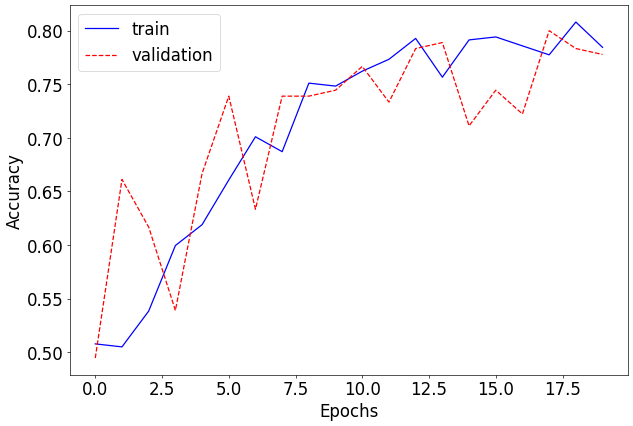

In [31]:
# Model 2 training

os.makedirs("weights/Model2", exist_ok=True)

learning_rate = 0.01
log_step = 3

model = Model2()
model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

num_epochs = 20
best_val_acc = 0
best_epoch = 0

history = []
accuracy = []
for epoch in range(num_epochs):
    adjust_learning_rate(optimizer, epoch)
    train_loss, train_acc = train()
    val_loss, val_acc = validate()
    history.append((train_loss, val_loss))
    accuracy.append((train_acc, val_acc))

    if val_acc > best_val_acc:
        print("[Info] best validation accuracy!")
        best_val_acc = val_acc
        best_epoch = epoch
        torch.save(model.state_dict(), f"weights/Model2/best_checkpoint_epoch_{epoch + 1}.pth")

torch.save(model.state_dict(), f"weights/Model2/last_checkpoint_epoch_{num_epochs}.pth")

plt.plot([x[0] for x in accuracy], 'b', label='train')
plt.plot([x[1] for x in accuracy], 'r--',label='validation')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

test_loss, test_accuracy = test()
print(f"Test loss: {test_loss:.8f}")
print(f"Test accuracy: {test_accuracy * 100.:.2f}%")

[Epoch: 1 - Training]
[Batch: 1] running train loss: 0.021362828090786934, running train accuracy: 0.375
[Batch: 4] running train loss: 0.021053054835647345, running train accuracy: 0.328125
[Batch: 7] running train loss: 0.0199257279081004, running train accuracy: 0.3638392984867096
[Batch: 10] running train loss: 0.019703518040478228, running train accuracy: 0.37812501192092896
train loss: 0.020595180640134426, accuracy: 0.3894297778606415
elapsed time: 5.8550074100494385
[Epoch: 1 - Validation]
[Batch: 1] running val loss: 0.01179066114127636, running val accuracy: 0.765625
val loss: 0.014117637607786391, accuracy: 0.6611111164093018
elapsed time: 0.9779720306396484
[Info] best validation accuracy!
[Epoch: 2 - Training]
[Batch: 1] running train loss: 0.017182186245918274, running train accuracy: 0.578125
[Batch: 4] running train loss: 0.017169519793242216, running train accuracy: 0.48828125
[Batch: 7] running train loss: 0.017397723958960602, running train accuracy: 0.48437502980232

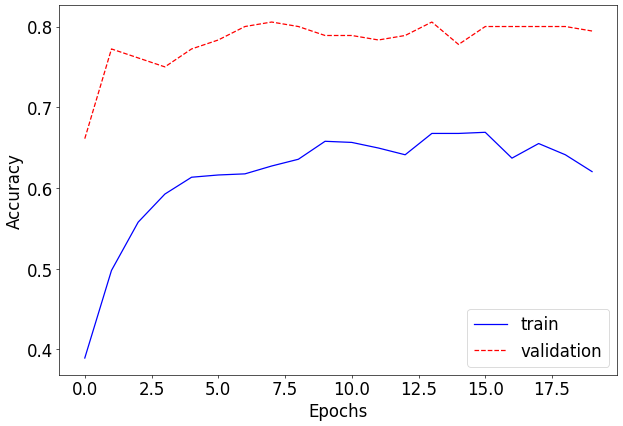

In [32]:
# model3
os.makedirs("weights/Model3", exist_ok=True)

learning_rate = 0.01
log_step = 3

model = Model3()
model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

num_epochs = 20
best_val_acc = 0
best_epoch = 0

history = []
accuracy = []

for epoch in range(num_epochs):
    adjust_learning_rate(optimizer, epoch)
    train_loss, train_acc = train()
    val_loss, val_acc = validate()
    history.append((train_loss, val_loss))
    accuracy.append((train_acc, val_acc))

    if val_acc > best_val_acc:
        print("[Info] best validation accuracy!")
        best_val_acc = val_acc
        best_epoch = epoch
        torch.save(model.state_dict(), f"weights/Model3/best_checkpoint_epoch_{epoch + 1}.pth")

torch.save(model.state_dict(), f"weights/Model3/last_checkpoint_epoch_{num_epochs}.pth")

plt.plot([x[0] for x in accuracy], 'b', label='train')
plt.plot([x[1] for x in accuracy], 'r--',label='validation')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

test_loss, test_accuracy = test()
print(f"Test loss: {test_loss:.8f}")
print(f"Test accuracy: {test_accuracy * 100.:.2f}%")